Import Libraries & Reading Dataset
---------------------------------------------

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
df = pd.read_csv(r"P:\Journey\ITI-DE\Data Visualization\Project\DataSets\Fatalities Isr-Pse Conflict 2000-2023.csv")

In [ ]:
df.columns

Index(['name', 'date_of_event', 'age', 'citizenship', 'event_location',
       'event_location_district', 'event_location_region', 'date_of_death',
       'gender', 'took_part_in_the_hostilities', 'place_of_residence',
       'place_of_residence_district', 'type_of_injury', 'ammunition',
       'killed_by', 'notes'],
      dtype='object')

1 Data inspection & Cleaning
---------------------------------------------

1.1 Missing Values

In [74]:
df.isnull().sum()

name                               0
date_of_event                      0
age                              129
citizenship                        0
event_location                     0
event_location_district            0
event_location_region              0
date_of_death                      0
gender                            20
took_part_in_the_hostilities    1430
place_of_residence                68
place_of_residence_district       68
type_of_injury                   291
ammunition                      5253
killed_by                          0
notes                            280
dtype: int64

1.2 Handling "Age" Column (Outliers & Missing Values)

In [5]:
df = df[df['age'] <= 100]
avg_age = df['age'].median()
df['age'].fillna(avg_age, inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_21484\2798800850.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(avg_age, inplace=True)


In [6]:
print(df['age'].isnull().sum())

0


1.3 Handling "Gender" Column (Missing Values)

In [7]:
df['gender'].fillna(df['gender'].mode()[0])

0        M
1        M
2        M
3        M
4        M
        ..
11119    M
11120    M
11121    M
11122    M
11123    M
Name: gender, Length: 10993, dtype: object

In [8]:
print(df['gender'].isnull().sum())

0


1.4 Handling "type of injury" Column (Missing Values)

In [9]:
df['type_of_injury'].fillna(df['type_of_injury'].mode()[0])

0        gunfire
1        gunfire
2        gunfire
3        gunfire
4        gunfire
          ...   
11119    gunfire
11120    gunfire
11121    gunfire
11122    gunfire
11123    gunfire
Name: type_of_injury, Length: 10993, dtype: object

In [10]:
print(df['type_of_injury'].isnull().sum())

281


1.5 Handling "Took Part in Hostilities" Column (1430 missing values, which can't be neglected) 

In [11]:
df['took_part_in_the_hostilities'].fillna("Unknown", inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_21484\3278889029.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['took_part_in_the_hostilities'].fillna("Unknown", inplace=True)


In [12]:
print(df['took_part_in_the_hostilities'].isnull().sum())

0


1.6 Dropping "Ammunition" Column (5253 missing values, more than 50%, unreliable data)

In [13]:
df.drop(columns=['ammunition'], inplace=True)

In [14]:
df.columns

Index(['name', 'date_of_event', 'age', 'citizenship', 'event_location',
       'event_location_district', 'event_location_region', 'date_of_death',
       'gender', 'took_part_in_the_hostilities', 'place_of_residence',
       'place_of_residence_district', 'type_of_injury', 'killed_by', 'notes'],
      dtype='object')

In [15]:
df.isnull().sum()

name                              0
date_of_event                     0
age                               0
citizenship                       0
event_location                    0
event_location_district           0
event_location_region             0
date_of_death                     0
gender                            0
took_part_in_the_hostilities      0
place_of_residence               44
place_of_residence_district      44
type_of_injury                  281
killed_by                         0
notes                           265
dtype: int64

1.7 Check for Duplicates

In [85]:
print(df.duplicated().sum())

0


1.8 Convert Data Types

In [86]:
df['date_of_event'] = pd.to_datetime(df['date_of_event'], errors='coerce')
df['date_of_death'] = pd.to_datetime(df['date_of_death'], errors='coerce')

df['gender'] = df['gender'].astype('category')
df['type_of_injury'] = df['type_of_injury'].astype('category')
df['killed_by'] = df['killed_by'].astype('category')

C:\Users\user\AppData\Local\Temp\ipykernel_19312\2736653237.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['date_of_event'] = pd.to_datetime(df['date_of_event'], errors='coerce')
C:\Users\user\AppData\Local\Temp\ipykernel_19312\2736653237.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['date_of_death'] = pd.to_datetime(df['date_of_death'], errors='coerce')


1.9 Save the Cleaned Dataset

In [101]:
df.to_csv("Cleaned_Fatalities_Dataset.csv", index=False)

----------------------------------------------------------------------------

2 Exploring Key Relationships of the Dataset
---------------------------------------------

2.1 Fatalities Over Time

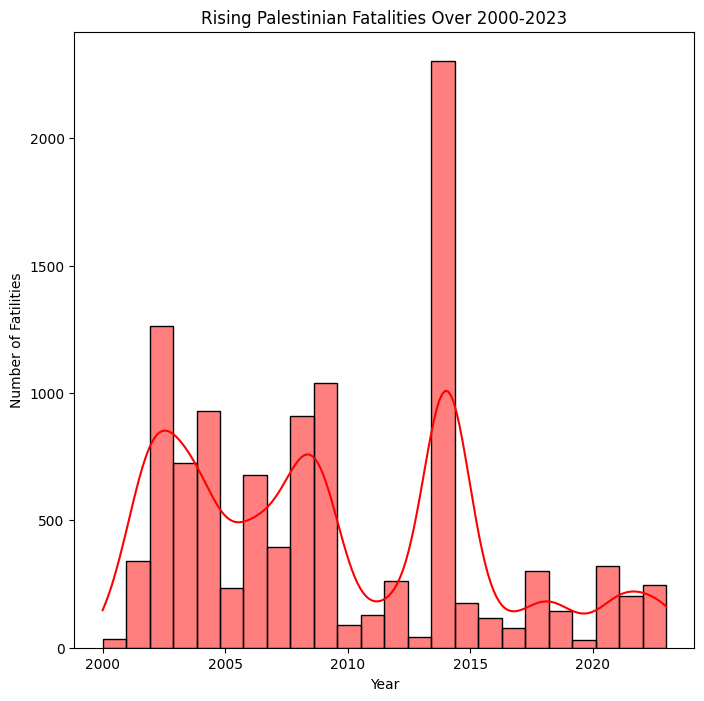

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(8,8))
sns.histplot(df['year'], bins=24, kde=True, color="red")
plt.title("Rising Palestinian Fatalities Over 2000-2023")
plt.xlabel("Year")
plt.ylabel("Number of Fatilities")
plt.show()

✅  Clear upward trend in Palestinian fatalities.

Certain years have extreme spikes, indicating escalations in Israeli military operations.

2.2 Age vs Participation in Hostilities

C:\Users\user\AppData\Local\Temp\ipykernel_19312\3205246514.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df["took_part_in_the_hostilities"], y=df["age"], palette="coolwarm", estimator=np.mean)


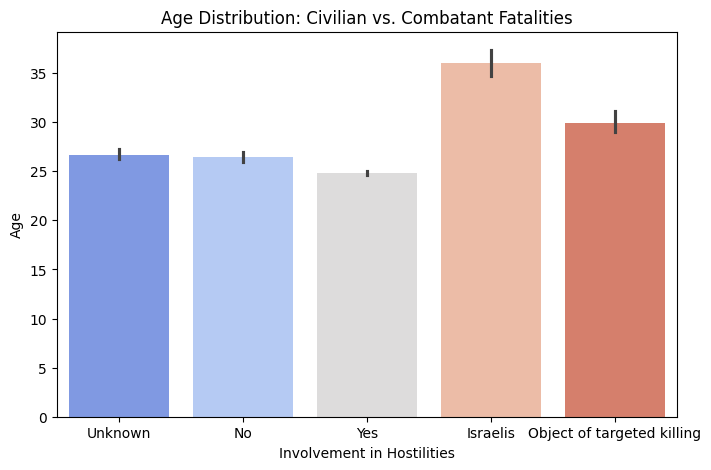

In [94]:
plt.figure(figsize=(8, 5))
sns.barplot(x=df["took_part_in_the_hostilities"], y=df["age"], palette="coolwarm", estimator=np.mean)
plt.title("Age Distribution: Civilian vs. Combatant Fatalities")
plt.xlabel("Involvement in Hostilities")
plt.ylabel("Age")
plt.show()

✅ Younger individuals are more likely to be involved in hostilities.
Civilians tend to be older, while combatants are often younger.

2.3 Regions with the Highest Fatalities 

In [95]:
districts = df['event_location_district'].value_counts()

C:\Users\user\AppData\Local\Temp\ipykernel_19312\3375091840.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=districts.index, y=districts.values, palette="Reds_r")


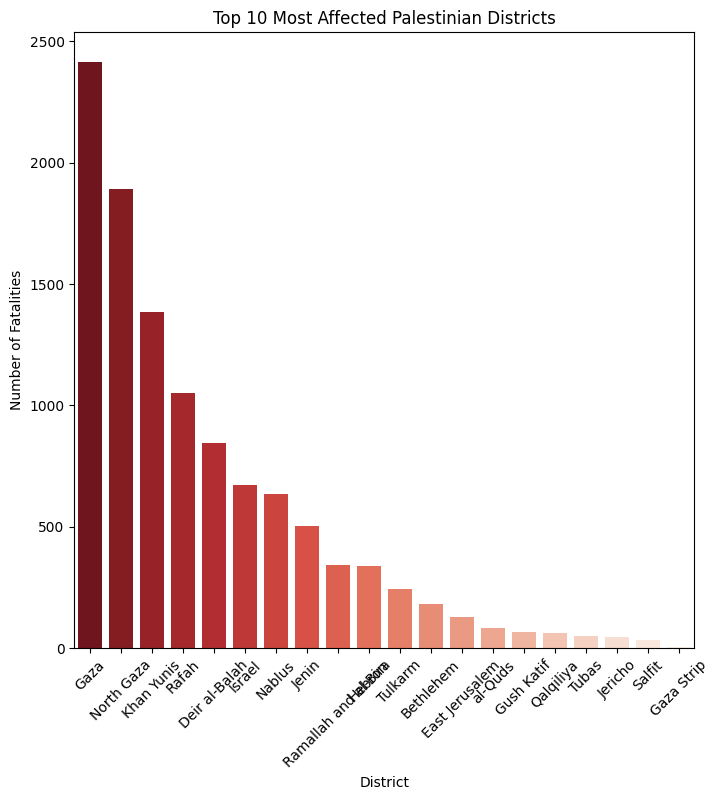

<Figure size 640x480 with 0 Axes>

In [97]:
plt.figure(figsize=(8,8))
sns.barplot(x=districts.index, y=districts.values, palette="Reds_r")
plt.xticks(rotation=45)
plt.title("Top 10 Most Affected Palestinian Districts")
plt.xlabel("District")
plt.ylabel("Number of Fatalities")
plt.show()
plt.savefig("plot.png")


✅ Certain Palestinian districts face an overwhelmingly high number of casualties.

This suggests areas under prolonged Israeli military pressure.

2.4 Gender vs Fatalities

C:\Users\user\AppData\Local\Temp\ipykernel_19312\2567798154.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['gender'], palette="coolwarm")


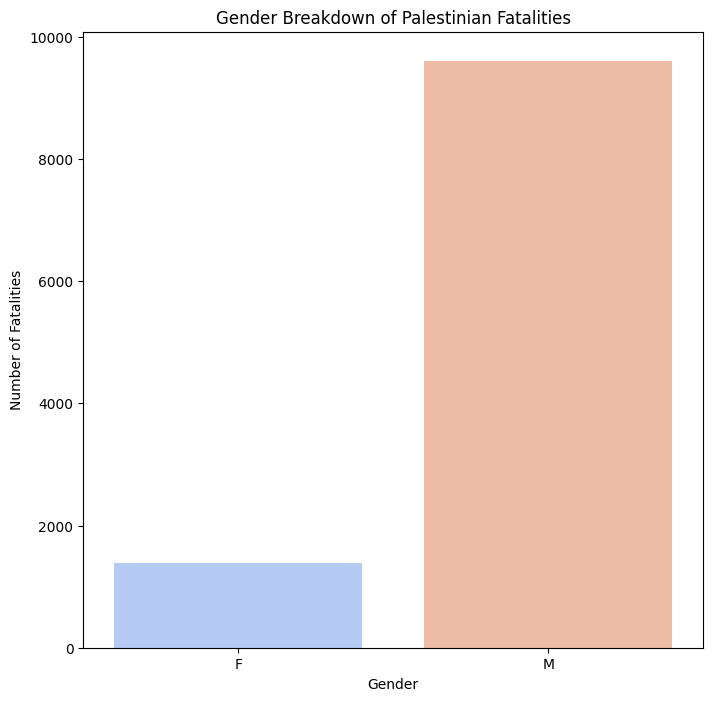

<Figure size 640x480 with 0 Axes>

In [99]:
plt.figure(figsize=(8,8))
sns.countplot(x=df['gender'], palette="coolwarm")
plt.title("Gender Breakdown of Palestinian Fatalities")
plt.xlabel("Gender")
plt.ylabel("Number of Fatalities")
plt.show()
plt.savefig("plot.png")

✅ Men account for the majority of deaths, but female casualties highlight civilian impact.

The high number of male fatalities suggests targeted operations, while the presence of women victims further emphasizes indiscriminate violence.



2.5 Causes of Deaths

C:\Users\user\AppData\Local\Temp\ipykernel_19312\3306109970.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='type_of_injury', palette='Reds_r')


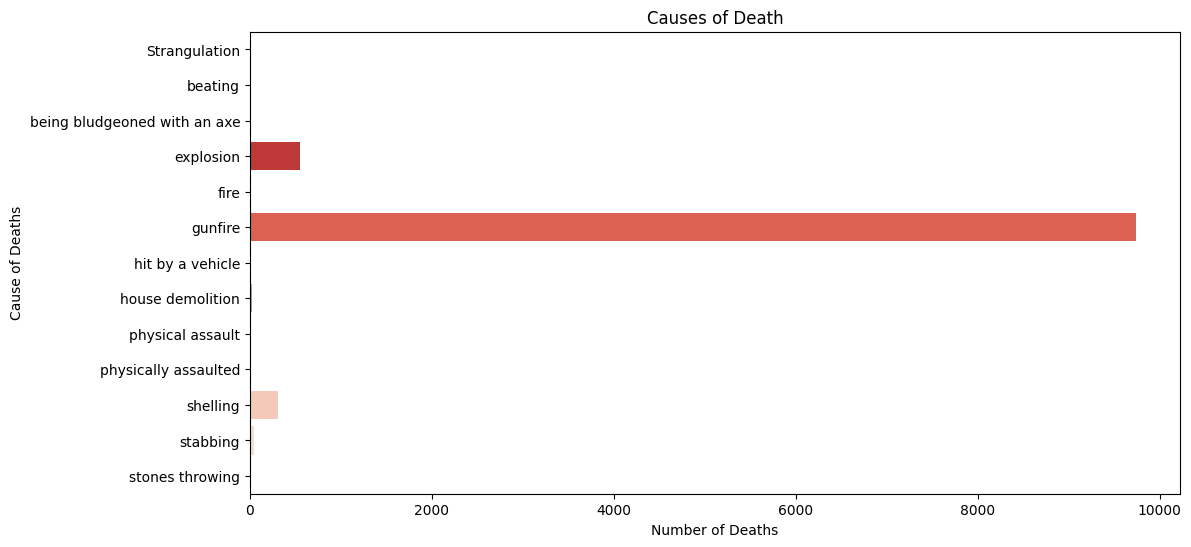

<Figure size 640x480 with 0 Axes>

In [100]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, y='type_of_injury', palette='Reds_r')
plt.title("Causes of Death")
plt.xlabel("Number of Deaths")
plt.ylabel("Cause of Deaths")
plt.show()
plt.savefig("plot.png")

----------------------------------------------------------------------------